# Visualization
**Python for HPC course**


Max Planck Computing and Data Facility, Garching

## Visualization with python

* Most used tool: **matplotlib**
* Other tools available (mayavi, interface to visit, ...)
* Here:
    * Matplotlib
    * Some examples
    * Some words on colors

## Matplotlib
* Python plotting library for 1D and 2D plots
* Can produce publication quality figures in different formats (pdf, png, ...)
* Variety of plot types
    * Line plots, scatter plots
    * Histograms, bar plots, box plots
    * Contour plots and pseudocolor maps of 2D data
    * Multiple plots per figure, annotations
    * Some support for 3D graphics
    * And more...
* [Documentation](https://matplotlib.org/contents.html)

### Line plots

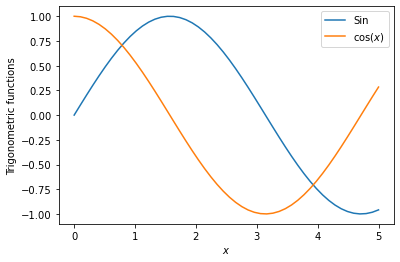

In [1]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(0.0, 5.0)
plt.figure()
plt.plot(xs, np.sin(xs), label="Sin")
plt.plot(xs, np.cos(xs), label=r"$\cos(x)$")
# alternatives:
#plt.semilogy(xs, np.sin(xs))
#plt.semilogx(xs, np.sin(xs))
#plt.loglog(xs, np.sin(xs))
plt.legend()
plt.xlabel('$x$')
plt.ylabel('Trigonometric functions')
plt.show()

* also object-oriented interface (axes object vs. plt.* functions)
* for publications:
    * set suitable figure width
    * save as vector graphics (e.g. pdf)

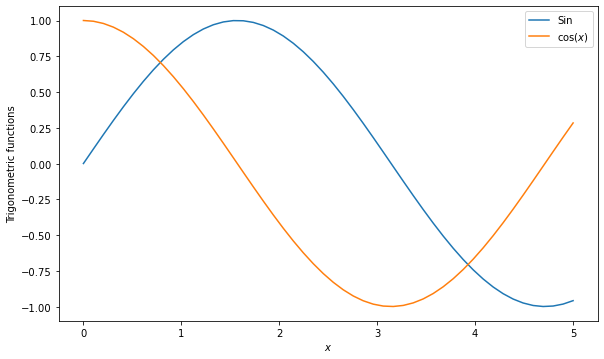

In [2]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(0.0, 5.0)
width = 8.5  # for best results: use width in inch the same as in paper -> no scaling required
f = plt.figure(figsize=(width, width*0.6))
ax = plt.subplot(111)
ax.plot(xs, np.sin(xs), label="Sin")
ax.plot(xs, np.cos(xs), label=r"$\cos(x)$")
ax.legend()
ax.set_xlabel('$x$')
ax.set_ylabel('Trigonometric functions')
f.tight_layout()   # shrink whitespace
f.savefig("trigonometric.pdf", dpi=300)   # always use vector graphics for papers!

* several panels possible:

In [3]:
import numpy as np
import matplotlib.pyplot as plt
xs = np.linspace(0.0, 5.0)
width = 10  # for best results: use width in inch the same as in paper -> no scaling required
f, axs = plt.subplots(2, 3, figsize=(width, width*0.6*2./3.), sharex=True)
axs[0,0].plot(xs, np.sin(xs))
axs[0,1].plot(xs, np.cos(xs))
axs[1,0].semilogy(xs, np.exp(xs), label=r"$\exp(x)$")
axs[1,0].semilogy(xs, np.exp(2.*xs), label=r"$\exp(2x)$")
axs[1,0].legend()
axs[1,2].plot(xs, xs**2, ls=':')  # different linestyle
axs[1,2].plot(xs, xs**3-50, marker='x') # use markers
axs[-1,0].set_xlabel('$x$')
axs[0,0].set_ylabel('Trigonometric functions')
f.tight_layout()   # shrink whitespace
#f.savefig("trigonometric.pdf", dpi=300)   # always use vector graphics for papers!

### 2D pseudo color plots with pcolormesh:

/tmp/ipykernel_1685267/3064593639.py:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z.T, cmap='PuOr')   # transpose necessary because pcolormesh expects matrix-like format


(-4.0, 5.0, -2.0, 4.0)

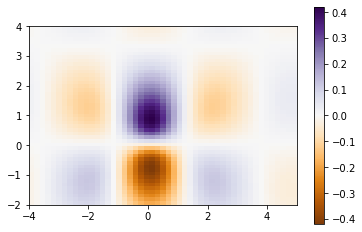

In [4]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-4.0, 5.0)
y = np.linspace(-2.0, 4.0)
xv, yv = np.meshgrid(y, x)
z = np.sin(3.*xv/np.pi)*np.cos(4.0*yv/np.pi) / (xv**2 + yv**2+1.0)
f = plt.figure()
# pcolormesh much faster than pcolor!
plt.pcolormesh(x, y, z.T, cmap='PuOr')   # transpose necessary because pcolormesh expects matrix-like format
plt.colorbar()
plt.axis('image')

## Colormaps
* Which colormap to use for visualizing data?
* Depends on many things, e.g.
    * knowledge of data set (critical values, ...)
    * intuitive color scheme available?
    * expectations of audience?
* guidelines:
    * *sequential* colormaps (monotonous change in lightness) for ordered data
    * *diverging* colormaps (two different colors meet in middle) for data deviating from a mean value
    * *qualitative* colormaps for information without ordering/relationships (e.g. different lines in line plots)
    * **avoid** the jet or rainbow colorscale
* [matplotlib colormaps](https://matplotlib.org/tutorials/colors/colormaps.html)

![Sequential colormaps](fig/colormaps_sequential.png)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-4.0, 5.0)
y = np.linspace(-2.0, 4.0)
xv, yv = np.meshgrid(y, x)
z = 1/(xv**2 + yv**2 + 0.5)*100
f = plt.figure()
plt.pcolormesh(x, y, z.T, cmap='viridis')
plt.colorbar(label="Intensity [W/cm$^2$]")
plt.ylabel('$y$ [cm]')
plt.xlabel('$x$ [cm]')
plt.axis('image')

/tmp/ipykernel_1685267/1080335468.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z.T, cmap='viridis')


(-4.0, 5.0, -2.0, 4.0)

![Diverging colormaps](fig/colormaps_diverging.png)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-4.0, 5.0)
y = np.linspace(-2.0, 4.0)
xv, yv = np.meshgrid(y, x)
z = np.sin(3.*xv/np.pi)*np.cos(4.0*yv/np.pi) / (xv**2 + yv**2+1.0)*5 + 273
f = plt.figure()
plt.pcolormesh(x, y, z.T, cmap='RdBu_r')
plt.colorbar(label="$T$ [K]")
plt.ylabel('$y$ [cm]')
plt.xlabel('$x$ [cm]')
plt.axis('image')

/tmp/ipykernel_1685267/3205858091.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x, y, z.T, cmap='RdBu_r')


(-4.0, 5.0, -2.0, 4.0)

### Changing default settings
* Use styles: store some settings in separate text file (see [examples](https://matplotlib.org/tutorials/introductory/customizing.html))
* You might want to choose colors also suitable for color-deficient people (~8% of men)

In [7]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


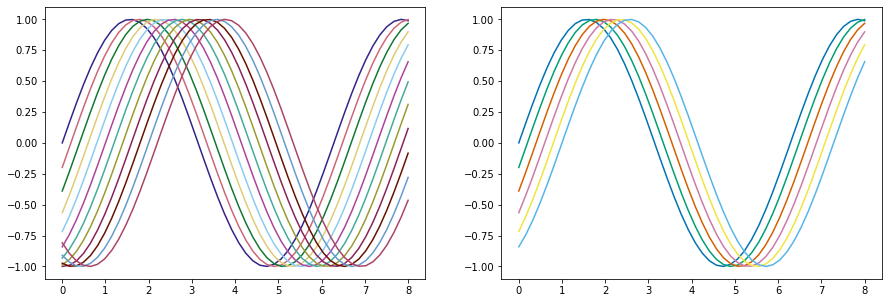

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from cycler import cycler
# example for a color scheme suited for color-deficient people
# from Paul Tol's page https://personal.sron.nl/~pault/
plt.rcParams['axes.prop_cycle'] = cycler('color', ['#332288', '#CC6677', '#117733', '#DDCC77', '#88CCEE', '#AA4499', '#44AA99', '#999933', '#882255', '#661100', '#6699CC', '#AA4466'])

xs = np.linspace(0.0, 8.0)
plt.figure(figsize=(15,5))
plt.subplot(121)
for i in range(12):
    plt.plot(xs, np.sin(xs-i/5.))
# use predefined style
plt.style.use('seaborn-colorblind')
plt.subplot(122)
for i in range(6):
    plt.plot(xs, np.sin(xs-i/5.))

## Interactive usage in jupyter notebook

<IPython.core.display.Javascript object>


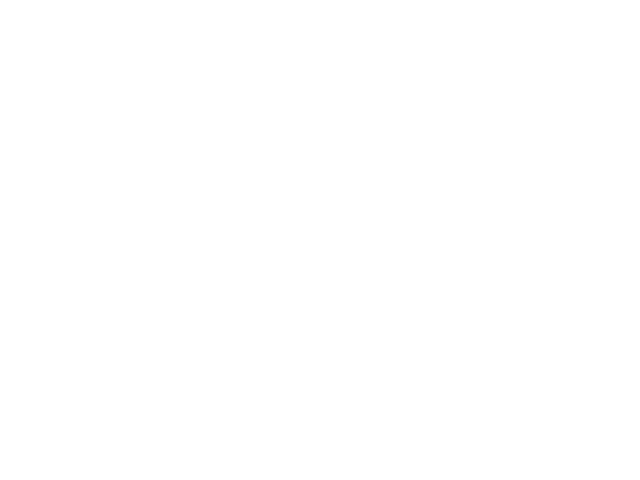

In [9]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.random.rand(100))

## Summary
* `matplotlib` provides publication-quality figures
* Integrates nicely with python codes
* Also good for postprocessing data from simulations
* Color scales:
    * Adapt to data
    * Adapt to viewers (include color-deficient viewers)
    * [Good examples for color scales](https://personal.sron.nl/~pault/)